# Diabetes 130-US hospitals for years 1999-2008 Data Set - Preprocessing danych
## Damian Skowroński | Warsztaty badawcze | Praca domowa 1
___

### Wprowadzenie
W tym dokumencie przeprowadzam preprocessing zbioru danych, który można znaleźć pod [tym linkiem](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008). Dane reprezentują opiekę kliniczą na przestrzeni 10 lat, od roku 1999 do 2008, w 130 amerykańskich szpitalach. Każda obserwacja to spotkanie, które spełniało następujące kryteria:

*   pacjent został przyjęty do szpitala
*   pacjent miał zdiagnozowany jakiś rodzaj cukrzycy i wprowadzono to do systemu
*   długość pobytu wynosiła od 1 do 14 dni
*   przeprowadzono badania laboratoryjne
*   podano leki


#### Wczytanie pakietów i zbioru danych

In [207]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


df = pd.read_csv("diabetic_data.csv")

### Podstawowe informacje
Pierwsze kilka wierszy ramki wygląda następująco:

In [208]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Ramka danych ma następujące wymiary:

*   Liczba obserwacji $= 101766$
*   Liczba kolumn $= 50$

#### Brakujące wartości
Na początku zamieniam brakujące wartości z symbolu _?_, na _None_.

In [209]:
df = df.replace(["?"],None);

missing = df.isna().sum()[df.isna().sum()>0].reset_index().rename(columns = {"index" : "column", 0 : "missing"})
missing["missing_%"] = missing["missing"]/df.shape[0] * 100  
missing

,column,missing,missing_%
0,race,2273,2.233555
1,weight,98569,96.858479
2,payer_code,40256,39.557416
3,medical_specialty,49949,49.082208
4,diag_1,21,0.020636
5,diag_2,358,0.351787
6,diag_3,1423,1.398306


Widać, że w kolumnach _weight_, _payer_code_ i _medical_specialty_ jest bardzo dużo wartości brakujących, więc w dalszej części zostaną odrzucone. Oprócz tego nie jestem pewien co zrobić z pozostałymi brakami, ale ponieważ jest ich stosunkowo niewiele to po prostu się ich potem pozbędę, usuwając obserwacje.

#### Typy zmiennych

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

W ramce danych jest $13$ zmiennych numerycznych, a pozostałe $37$ wartości to zmienne kategoryczne.

Problematyczny jest fakt, że zmienna _age_ jest zmienną kategoryczną - w dalszej części dokonam zmiany.

### Zmienne objaśniające i zmienna objaśniana
Zmienną objaśnianą jest _readmitted_, zaś pozostałe zmienne z wyjątkiem _encounter_id_ i _patient_nbr_ są zmiennymi objaśniającymi.

### Zmniejszenie ilości zmiennych
W tej części zastanowię się, które zmienne należy odrzucić. W części o brakujących danych stwierdziłem, że odrzucić należy:

* _weight_
* _payer_code_
* _medical_specialty_

Dodatkowo na podstawie tego co zmienne opisują, nie potrzebne są następujące zmienne:

* _encounter_id_ - unikalny identyfikator spotkania
* _patient_nbr_ - unikalny identifikator pacjenta

In [192]:
df = df.drop(columns=["encounter_id","patient_nbr","weight","payer_code","medical_specialty"]);

Tak jak wcześniej uznałem, usuwam również obserwacje z brakującymi danymi.

In [193]:
df = df.dropna()

### Analiza jednowymiarowa 

Zmienne numeryczne:

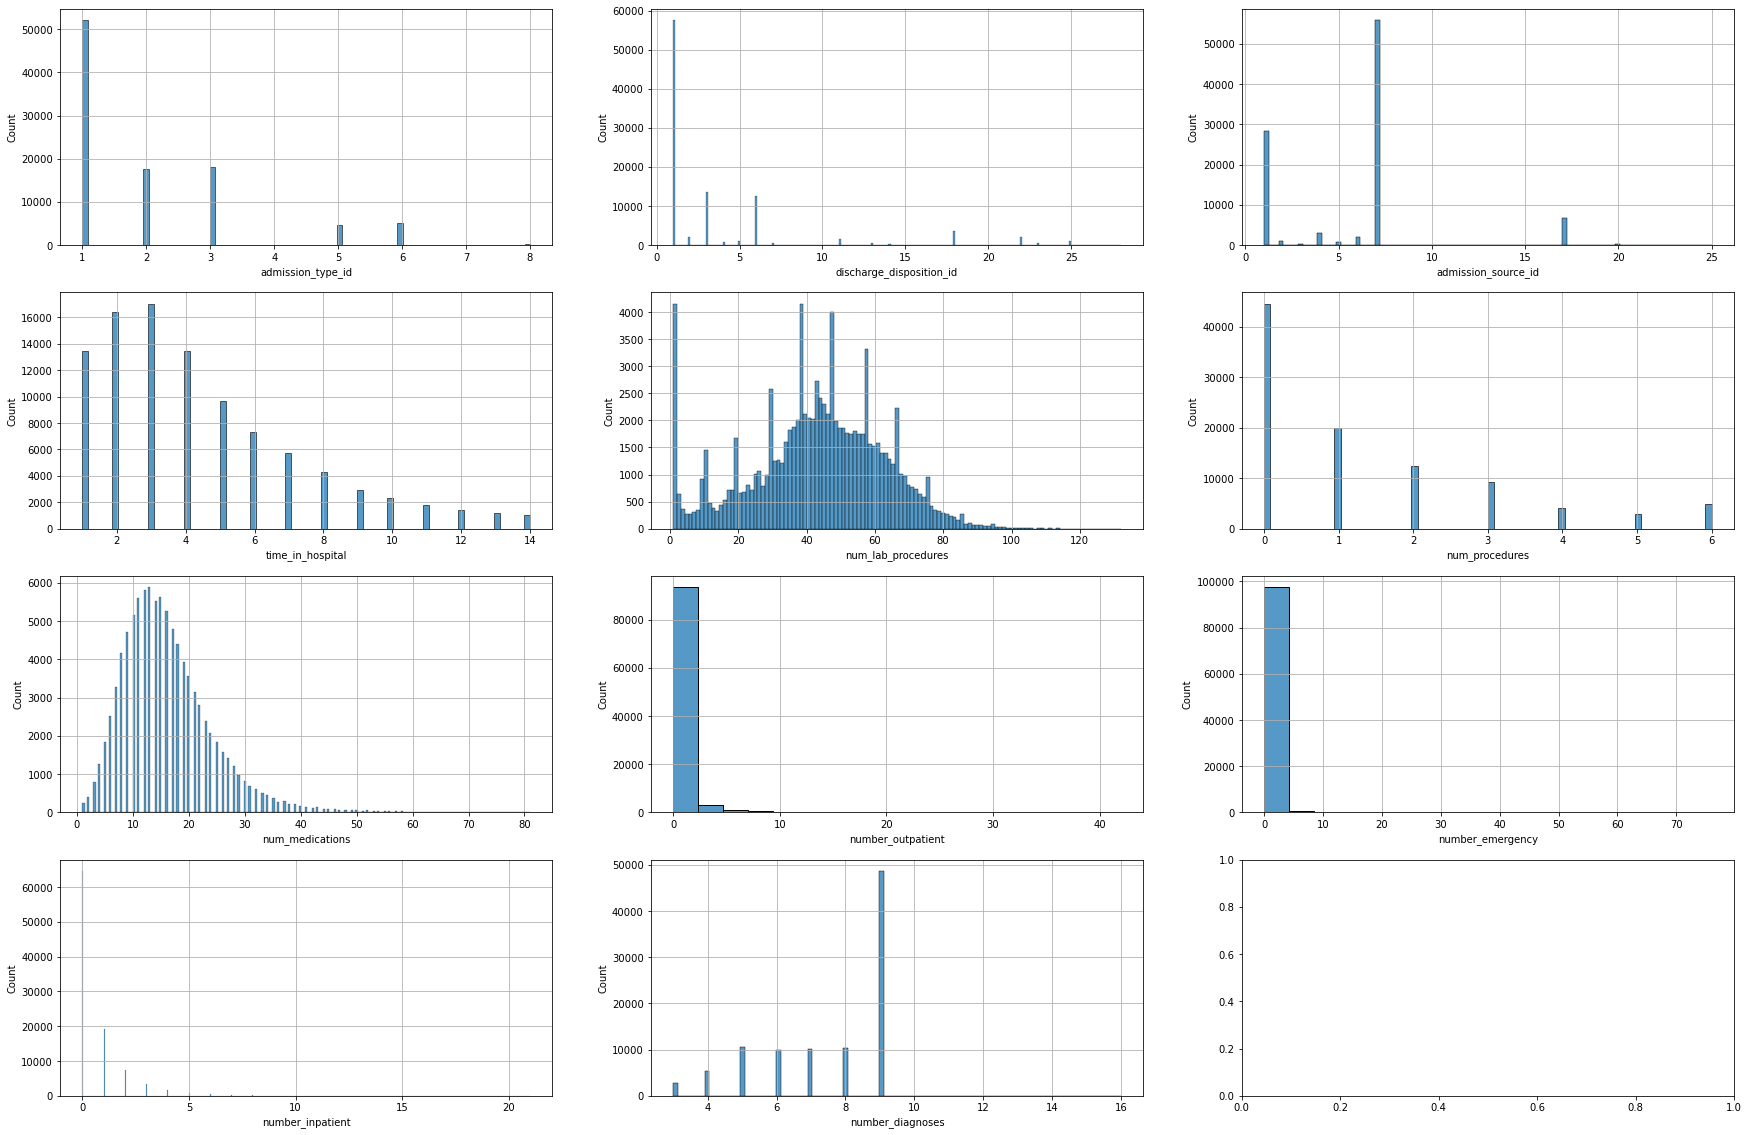

In [194]:
fig, ax = plt.pyplot.subplots(4,3,figsize = (30,20))
for column, subplot in zip(df.select_dtypes(include = "int64"),ax.flatten()):
    sns.histplot(x = column, data = df, ax = subplot).grid(visible = True);

In [195]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000
mean,2.025813,3.753368,5.776692,4.421976,43.148073,1.350749,16.119650,0.376378,0.202462,0.646864,7.512060
std,1.450117,5.309392,4.071640,2.993074,19.712033,1.708506,8.108476,1.283359,0.942892,1.271020,1.832497
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Zmienne kategoryczne:

*   wszystkie oprócz, opisujących leki i diagnozy

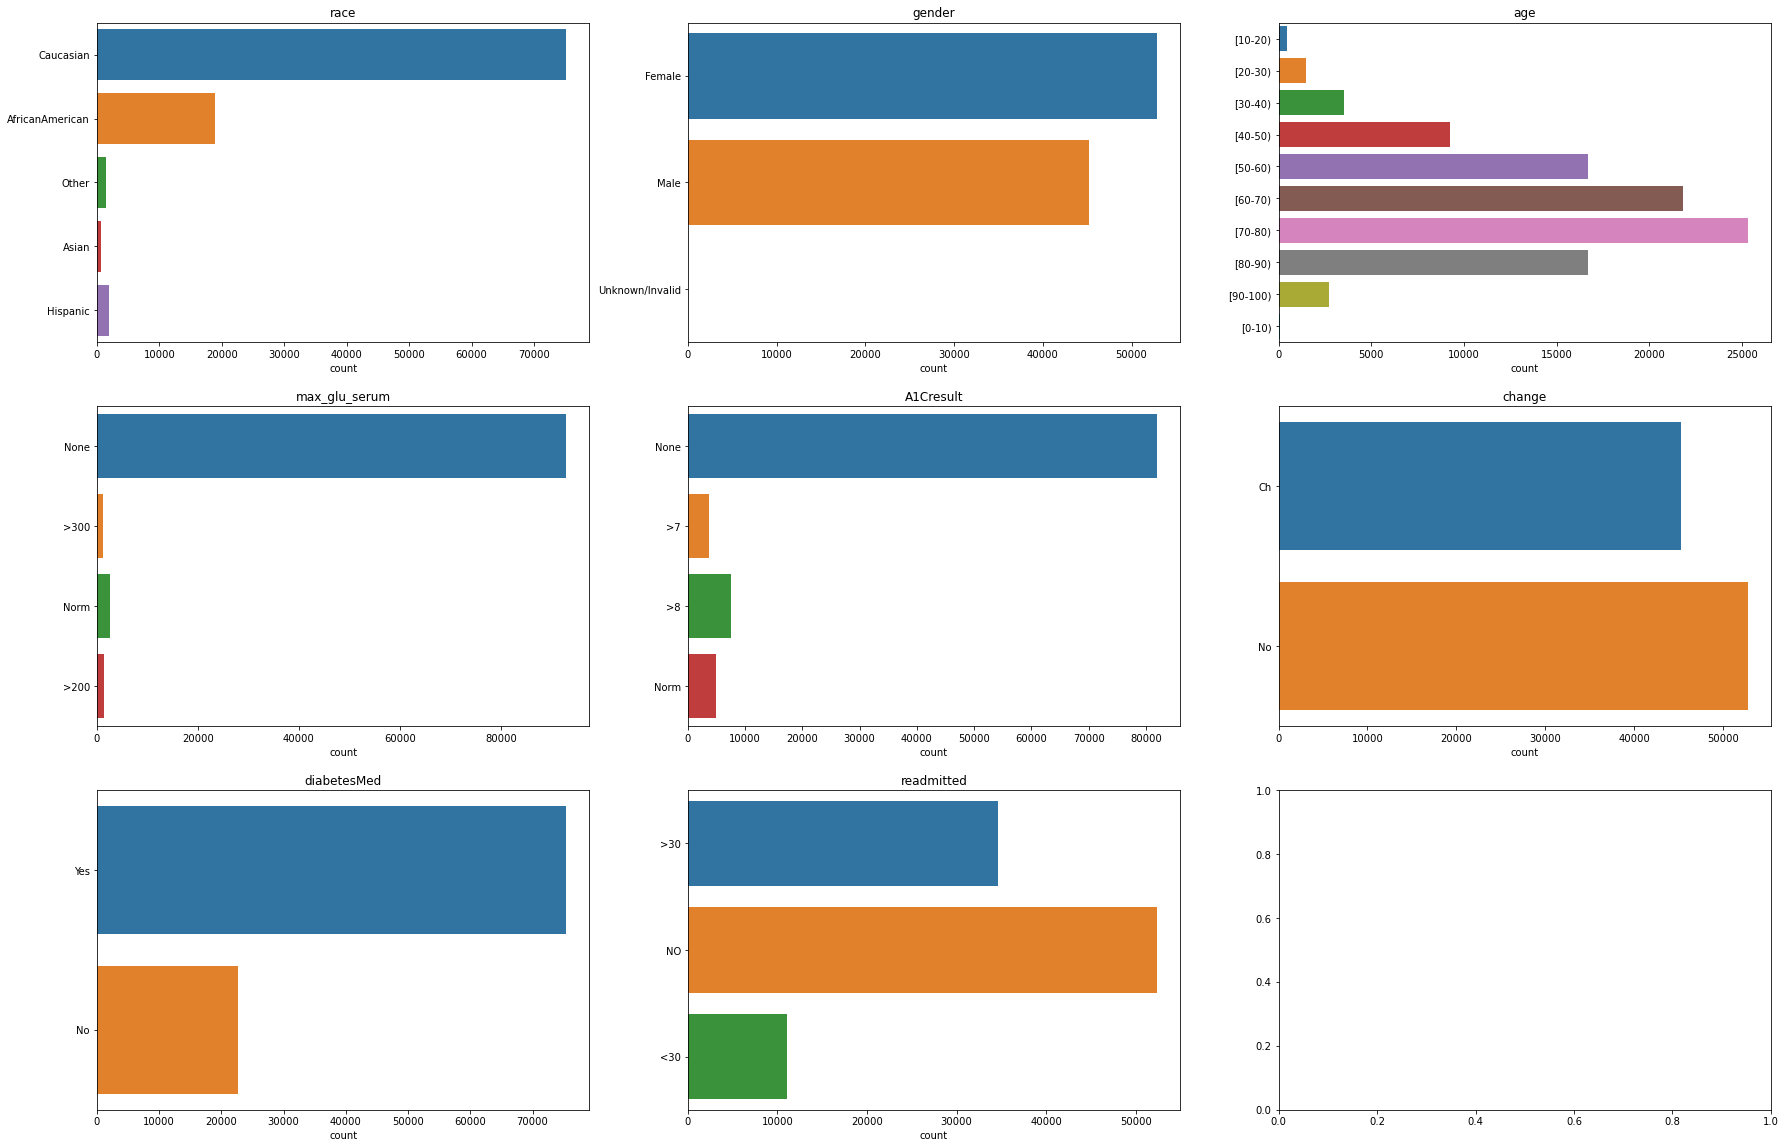

In [196]:
cat_cols = df.select_dtypes(include = "object").columns
fig, ax = plt.pyplot.subplots(3,3,figsize = (30,20))
for column, subplot in zip(cat_cols[[0,1,2,6,7,31,32,33]],ax.flatten()):
    sns.countplot(y = column, data = df, ax = subplot)
    subplot.set_title(column)
    subplot.set_ylabel("")    

*   diagnozy

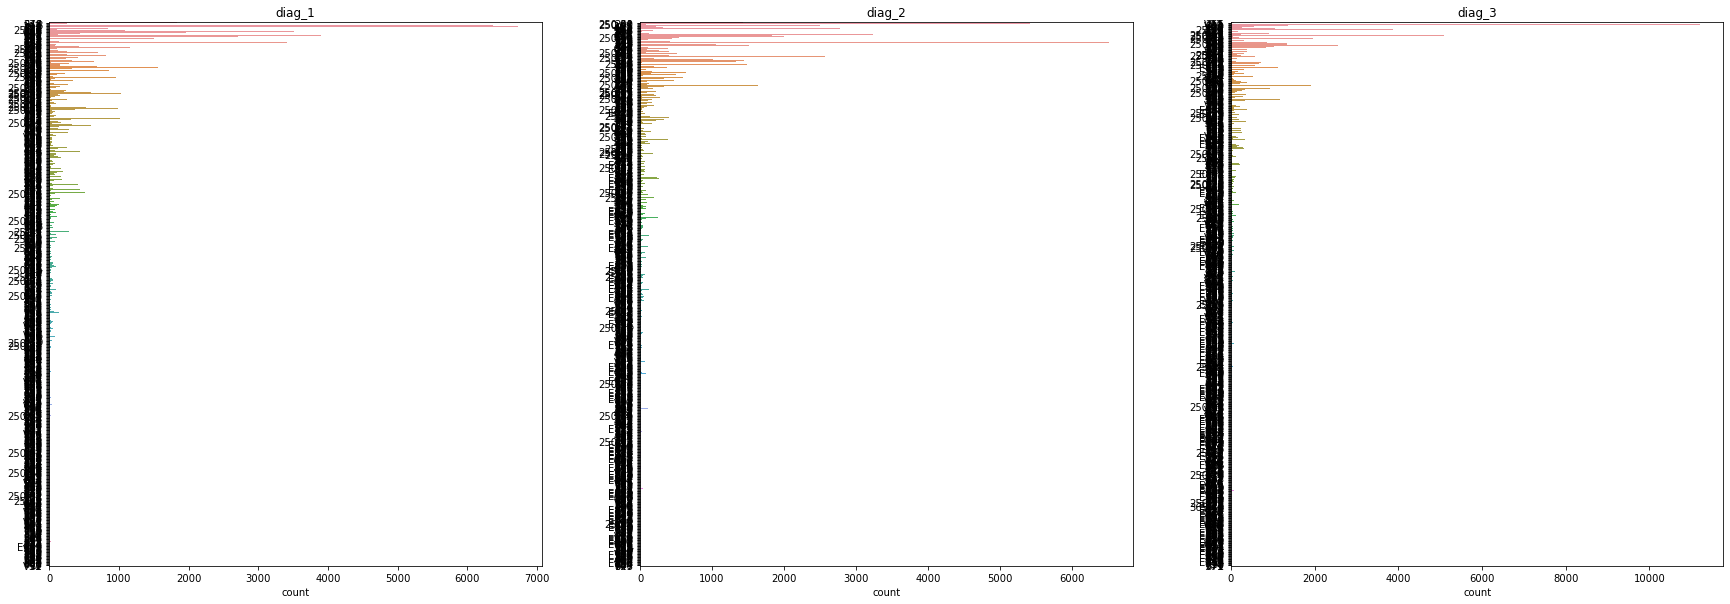

In [197]:
fig, ax = plt.pyplot.subplots(1,3,figsize = (30,10))
for column, subplot in zip(cat_cols[[3,4,5]],ax.flatten()):
    sns.countplot(y = column, data = df, ax = subplot)
    subplot.set_title(column)
    subplot.set_ylabel("")

Jedyny wniosek jest taki, że niektóre kody pojawiają się rzadko. Pewnie, jeśli potrzeba, można zrobić dokładniejszą analizę dowiadując się co ogólnikowo oznaczją dane kody i jakoś je kategoryzować.

* dotyczące leków

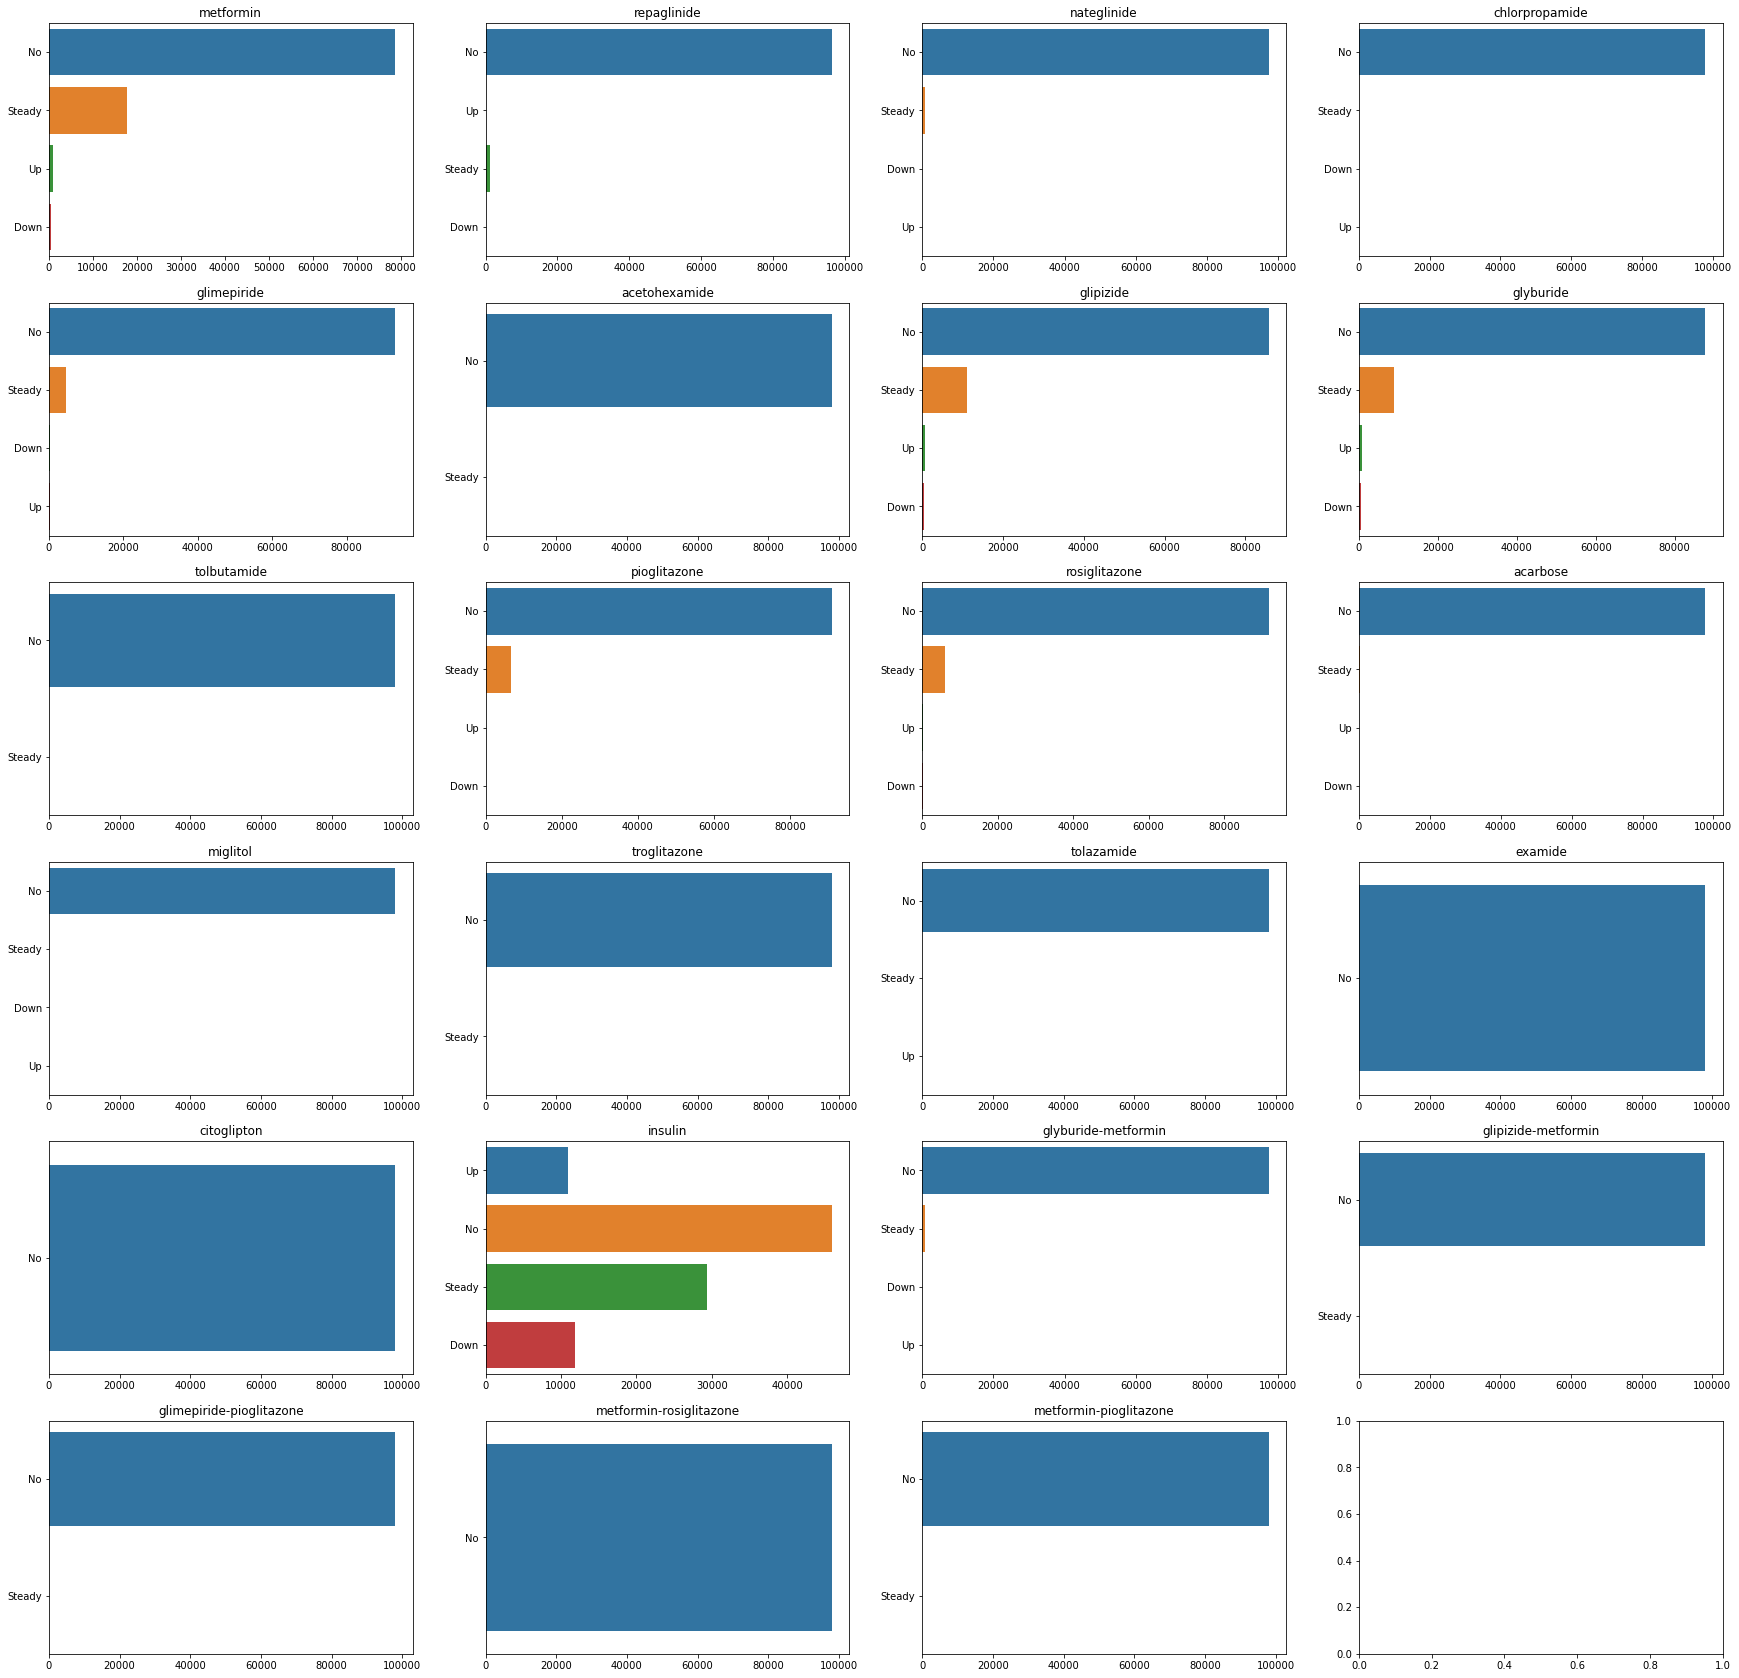

In [198]:
fig, ax = plt.pyplot.subplots(6,4,figsize = (30,30))
for column, subplot in zip(cat_cols[range(8,len(cat_cols) - 3)],ax.flatten()):
    sns.countplot(y = column, data = df, ax = subplot)
    subplot.set_title(column)
    subplot.set_ylabel("")
    subplot.set_xlabel("")

Większość zmiennych ma prawie wszystkie wartości _No_, u _citoglipton_ i _examide_   jest to jedyna unikalną wartość. Dla zmiennych pojawiają się inne wartości, głównie _Steady_. Wyjątkową zmienną jest _insulin_, w której stosunkowo często występuje każda z wartości.

#### Analiza wielowymiarowa 

Dokładne wartości korelacji:

In [199]:
df.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
admission_type_id,1.000000,0.079878,0.109265,-0.012209,-0.141212,0.129468,0.080273,0.026126,-0.019799,-0.037119,-0.122603
discharge_disposition_id,0.079878,1.000000,0.016532,0.162907,0.022610,0.013867,0.106692,-0.010277,-0.025988,0.019039,0.038427
admission_source_id,0.109265,0.016532,1.000000,-0.007975,0.048061,-0.134676,-0.055741,0.025307,0.059001,0.035541,0.071770
time_in_hospital,-0.012209,0.162907,-0.007975,1.000000,0.318647,0.191133,0.464199,-0.010910,-0.010506,0.072288,0.211242
num_lab_procedures,-0.141212,0.022610,0.048061,0.318647,1.000000,0.058665,0.267843,-0.008619,-0.002138,0.039207,0.150289
num_procedures,0.129468,0.013867,-0.134676,0.191133,0.058665,1.000000,0.382958,-0.026459,-0.038727,-0.067545,0.058929
num_medications,0.080273,0.106692,-0.055741,0.464199,0.267843,0.382958,1.000000,0.042650,0.012125,0.062901,0.241481
number_outpatient,0.026126,-0.010277,0.025307,-0.010910,-0.008619,-0.026459,0.042650,1.000000,0.091034,0.105980,0.091418
number_emergency,-0.019799,-0.025988,0.059001,-0.010506,-0.002138,-0.038727,0.012125,0.091034,1.000000,0.267175,0.054620
number_inpatient,-0.037119,0.019039,0.035541,0.072288,0.039207,-0.067545,0.062901,0.105980,0.267175,1.000000,0.101252


<AxesSubplot:>

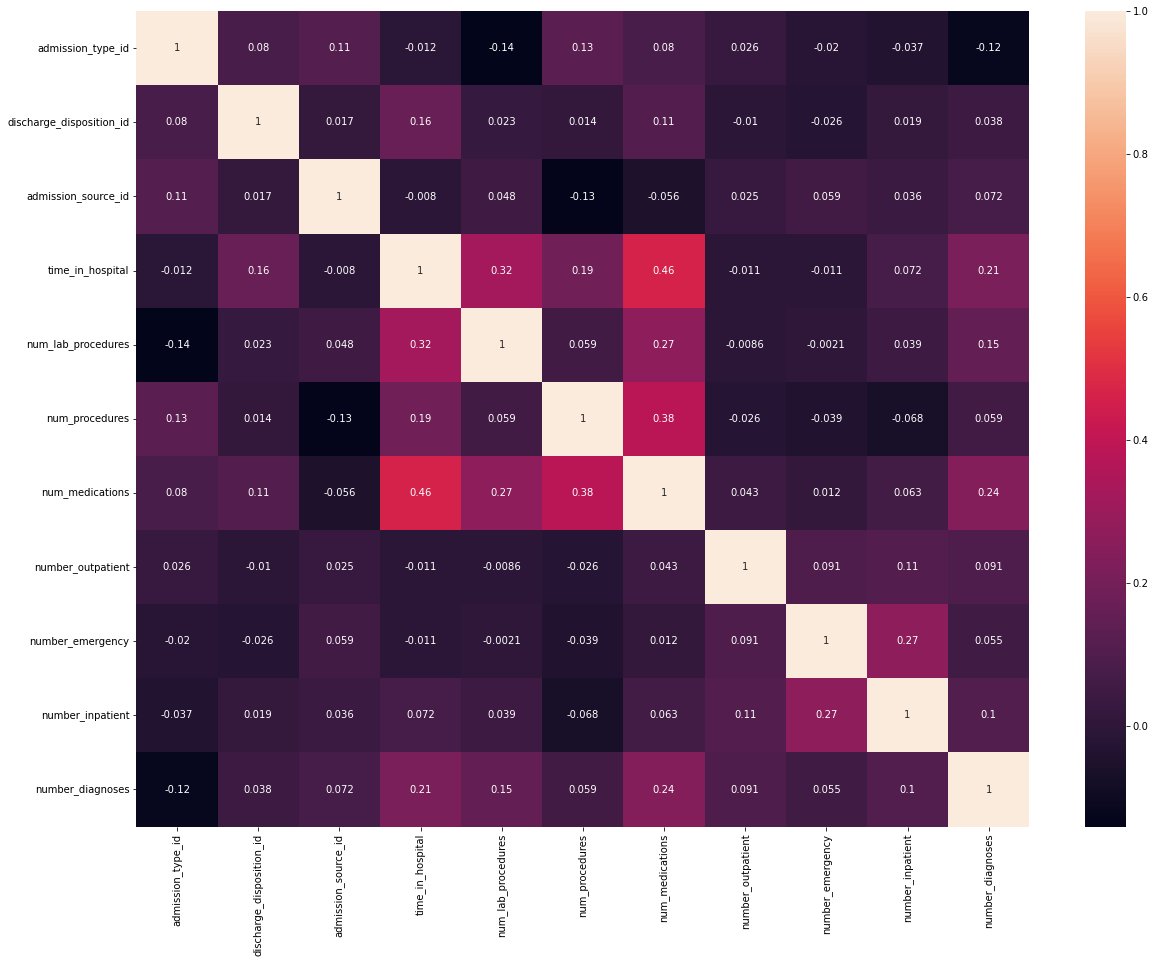

In [200]:
fig, ax = plt.pyplot.subplots(figsize = (20, 15))
sns.heatmap(df.corr(),annot=True)

Wydaje się, że żadne ze zmiennych nie są ze sobą wystarczająco skorelowane, aby była potrzeba je usuwać.

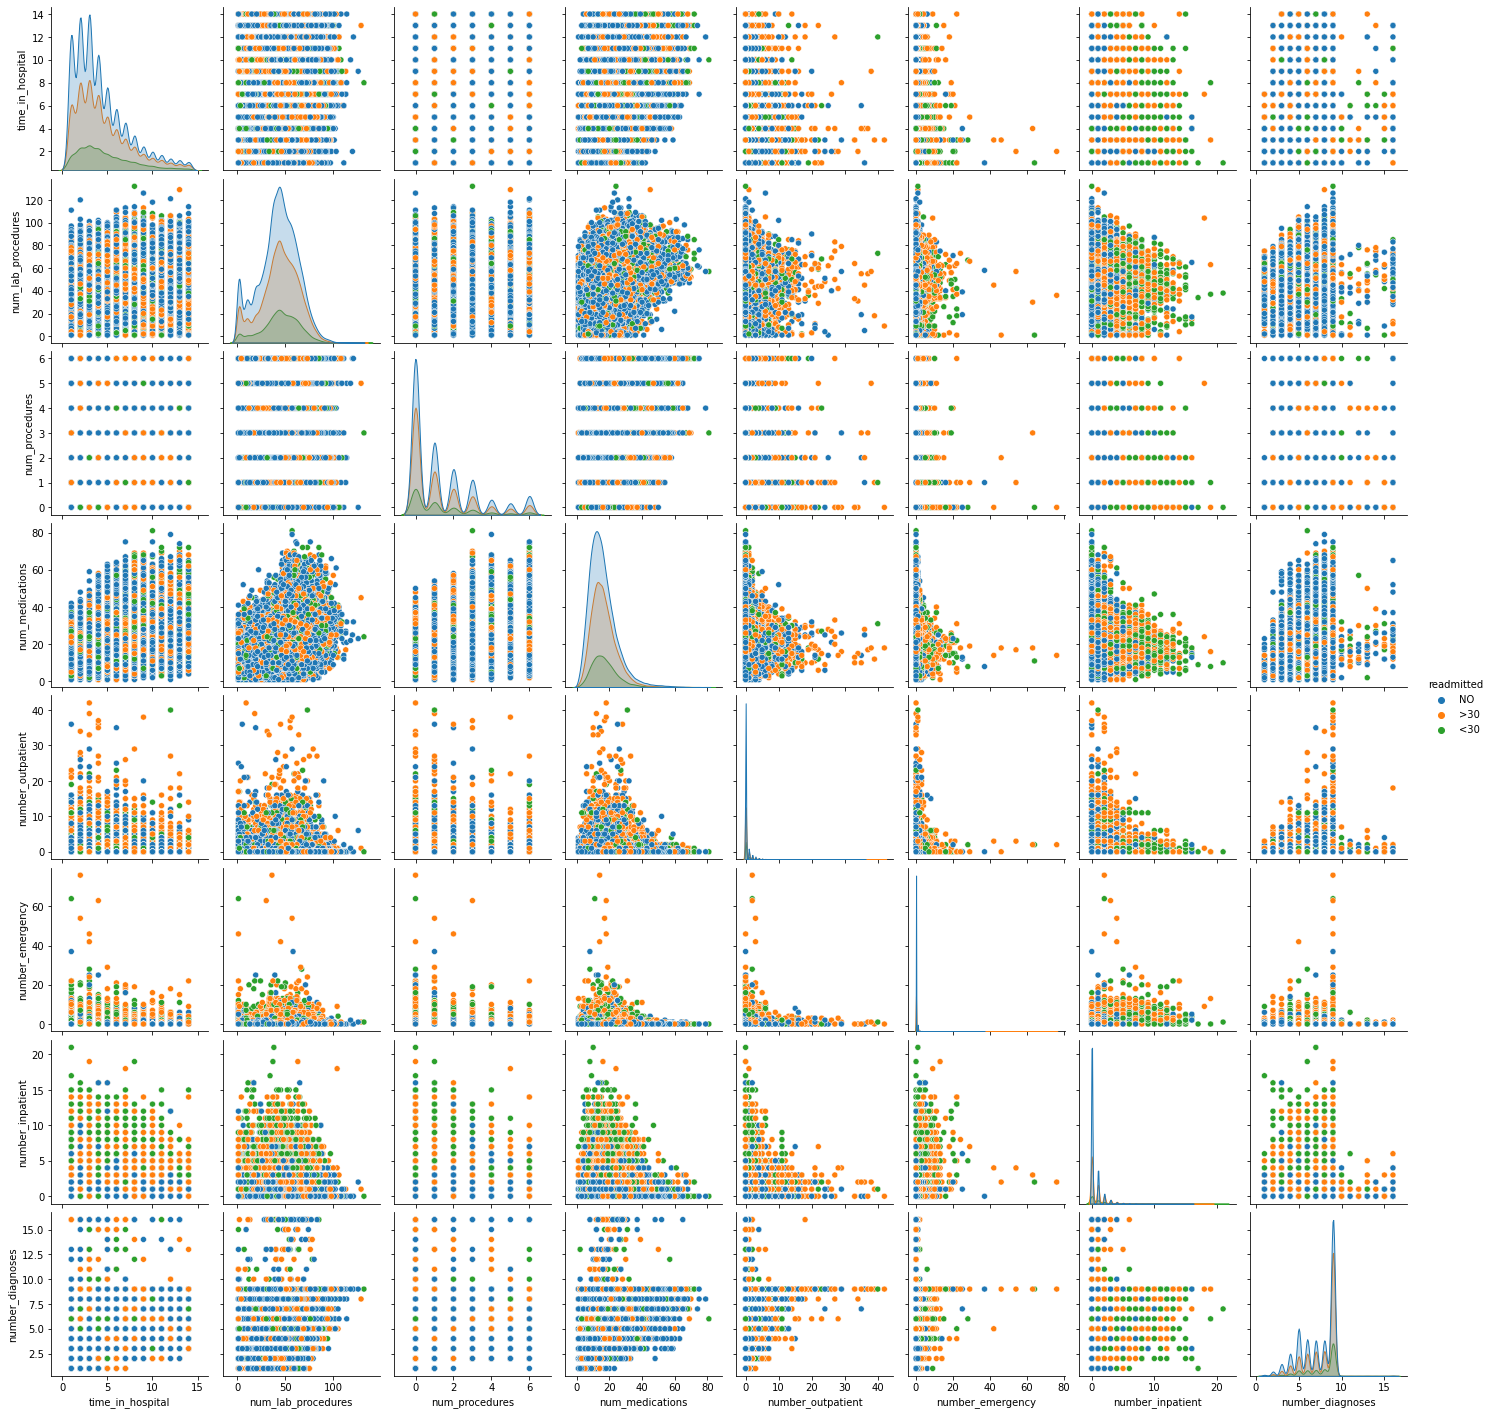

In [213]:
sns.pairplot(df[["time_in_hospital","num_lab_procedures","num_procedures","num_medications",
                 "number_outpatient","number_emergency","number_inpatient","number_diagnoses","readmitted"]],hue = "readmitted")


### Encoding zmiennych kategorycznych
W tym celu stosuję Label Encoding.


In [201]:
cols =  cat_cols.delete([2,3,4,5])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cols:
    df[col] = label_encoder.fit_transform(df[col])

### Transformacja zmiennych
Zajmuję się zmianą zmiennych:

* _age_ - zamiana przedziałów, na wartość środkową
* _diag_1_, _diag_2_, _diag_3_ - uogólnienie na podstawie [tabelki 2](https://www.hindawi.com/journals/bmri/2014/781670/tab2/) z [artykułu](https://www.hindawi.com/journals/bmri/2014/781670/)

In [202]:
df["age"] = df["age"].map({
    "[0-10)" : 5,
    "[10-20)" : 15,
    "[20-30)" : 25,
    "[30-40)" : 35,
    "[40-50)" : 45,
    "[50-60)" : 55,
    "[60-70)" : 65,
    "[70-80)" : 75,
    "[80-90)" : 85,
    "[90-100)" : 95
})

In [203]:
def categorise_diag(x): #ale strata czasu pisanie tego... :(
    if x.isdigit():
        y = int(x)
        if y == 785 or y >= 390 and y <= 459:
            return "Circulatory"
        
        if y == 786 or y>= 460 and y<= 519:
            return "Respiratory"
        
        if y == 787 or y >= 520 and y <= 579:
            return "Digestive"

        if y >= 800 and y <= 999:
            return "Injury"
        
        if y >= 710 and y <= 739:
            return "Muscoloskeletal"
        
        if y == 788 or y >= 580 and y <= 629:
            return "Genitourinary"
        
        if (y >= 1 and y <= 279) or (y >= 780 and y <= 799) or (y >= 680 and y <= 709) :
            return "Neoplasm"
        
    elif x.startswith("250."):
        return "Diabetes"
    
    else:
        return "Other"
        

In [204]:
for col in ["diag_1","diag_2","diag_3"]:
    df[col] = df[col].apply(categorise_diag)

Co sprawia, że diagnozy wyglądają tak:

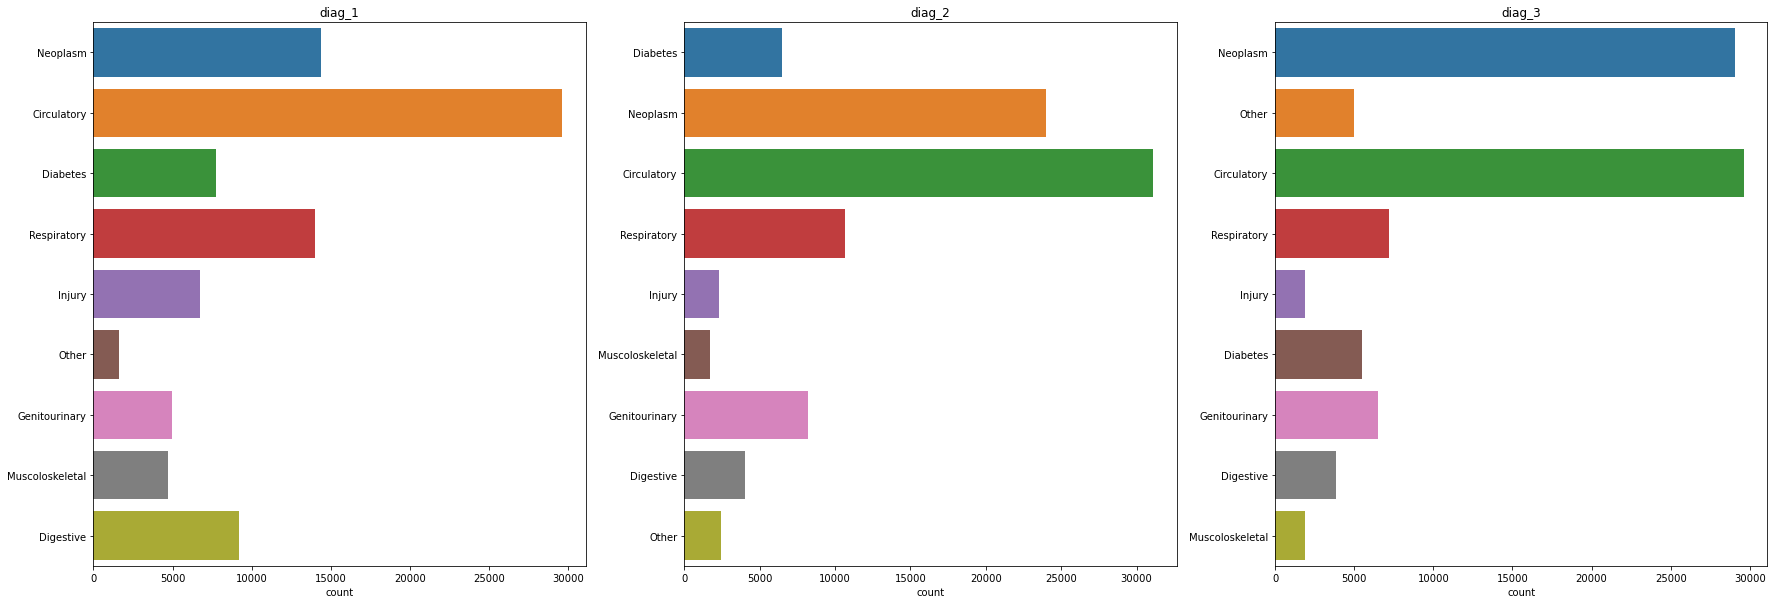

In [205]:
fig, ax = plt.pyplot.subplots(1,3,figsize = (30,10))
for column, subplot in zip(["diag_1","diag_2","diag_3"],ax.flatten()):
    sns.countplot(y = column, data = df, ax = subplot)
    subplot.set_title(column)
    subplot.set_ylabel("")

Ostatecznie ramka wygląda następująco:

In [206]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,15,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,1
2,0,0,25,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,2
3,2,1,35,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,2
4,2,1,45,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,2
5,2,1,55,2,1,2,3,31,6,16,...,0,2,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,75,1,3,7,3,51,0,16,...,0,0,1,0,0,0,0,0,1,1
101762,0,0,85,1,4,5,5,33,3,18,...,0,2,1,0,0,0,0,1,1,2
101763,2,1,75,1,1,7,1,53,0,9,...,0,0,1,0,0,0,0,0,1,2
101764,2,0,85,2,3,7,10,45,2,21,...,0,3,1,0,0,0,0,0,1,2
